### Import Data and Libraries

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Analysis

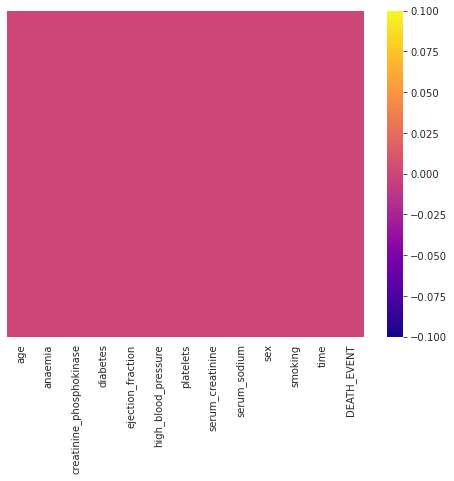

In [3]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isna(),yticklabels=False, cmap='plasma')
plt.show()

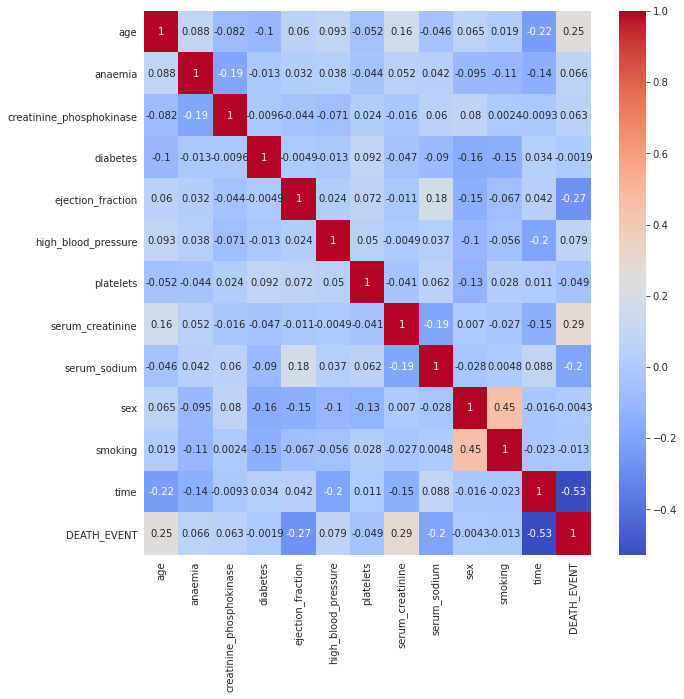

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
len(data.columns)

13

In [8]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [9]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [10]:
data['DEATH_EVENT'].value_counts()/len(data)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

The data has in total 299 instances and 13 features.
Out of 13, 6 are categorical features and 7 are numeric features.
There are no NULL values in the dataset.
This cn be considered a balanced dataset as the ration is 1:3 and there are pretty much instances to train the model for both the categorical values. 
0 : False (203)
1 : True  (096)
The independent variable is 'DEATH_EVENT' indicating whether the patient expired or not.

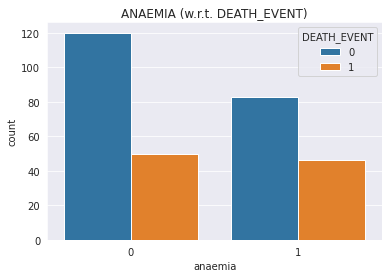

anaemia  DEATH_EVENT
0        0              120
         1               50
1        0               83
         1               46
Name: DEATH_EVENT, dtype: int64


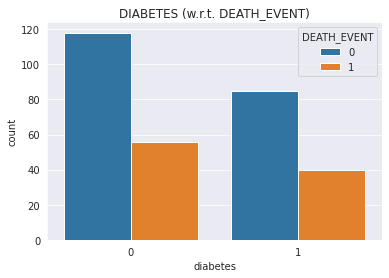

diabetes  DEATH_EVENT
0         0              118
          1               56
1         0               85
          1               40
Name: DEATH_EVENT, dtype: int64


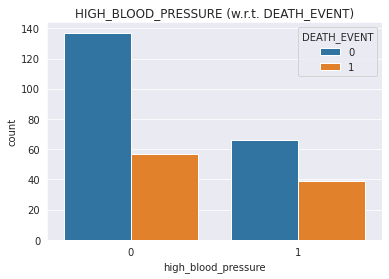

high_blood_pressure  DEATH_EVENT
0                    0              137
                     1               57
1                    0               66
                     1               39
Name: DEATH_EVENT, dtype: int64


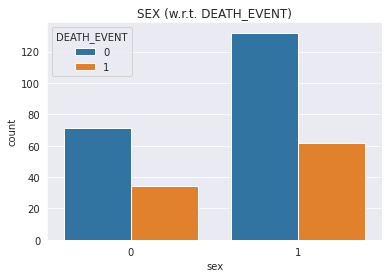

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: DEATH_EVENT, dtype: int64


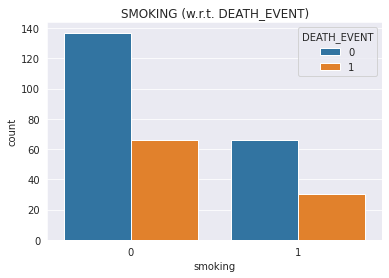

smoking  DEATH_EVENT
0        0              137
         1               66
1        0               66
         1               30
Name: DEATH_EVENT, dtype: int64


In [11]:
cat_features = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for cat in cat_features:
    sns.countplot(data[cat], hue=data.DEATH_EVENT)
    plt.title(cat.upper()+' (w.r.t. DEATH_EVENT)')
    plt.show()
    print(data.groupby(cat)['DEATH_EVENT'].value_counts())

Anaemia : The risk of heart failure is more than if the person has anaemia. There are approx. 33% chances of death if the person has anaemia.

Diabetes : Like anaemia, diabetes also responsible for the heart failure. About 33% of total people having diabetes can die of heart failure.

High BP : More than 33% people with High BP problem can die of heart failure. 

Sex : There is no relation between sex of a person and heart failure as both the gender has almost same risk of havig heart failure.

Smoking : There are approx 33% chances of a smoker to die of heart failure.

So, the statistics of all of the categorical features leading to death is almost same.

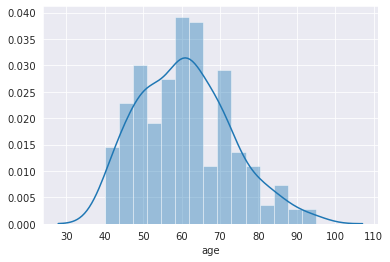

In [12]:
sns.distplot(data.age,bins=15)

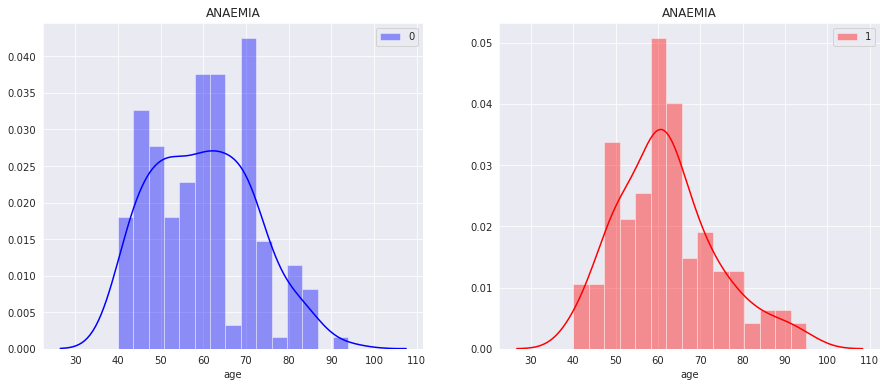

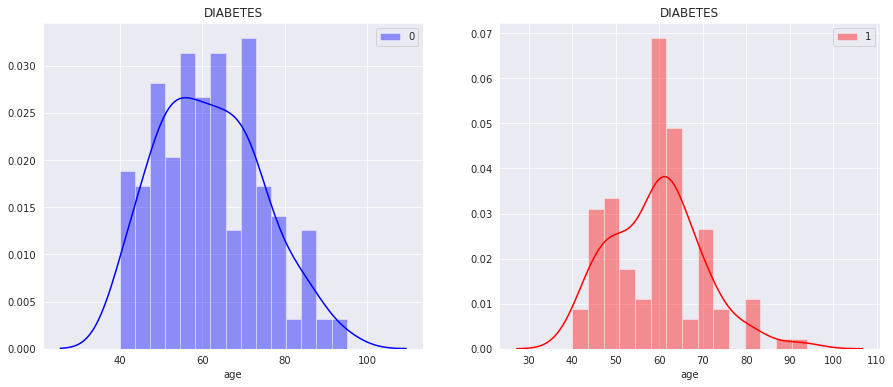

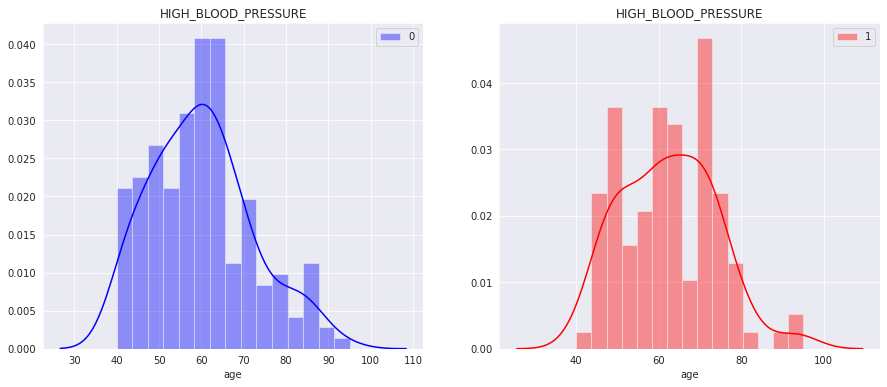

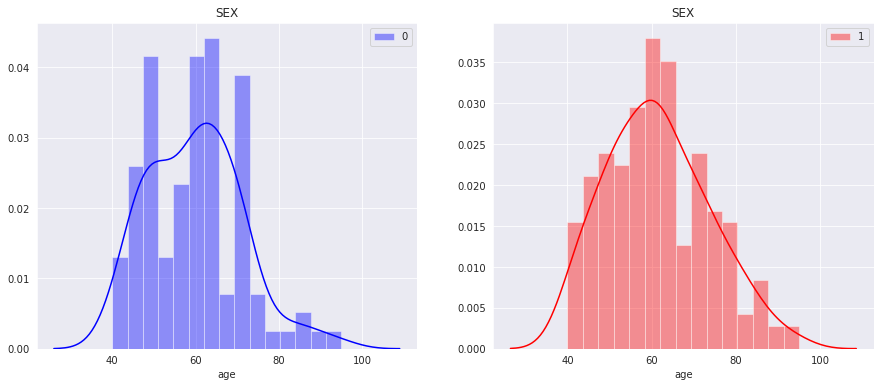

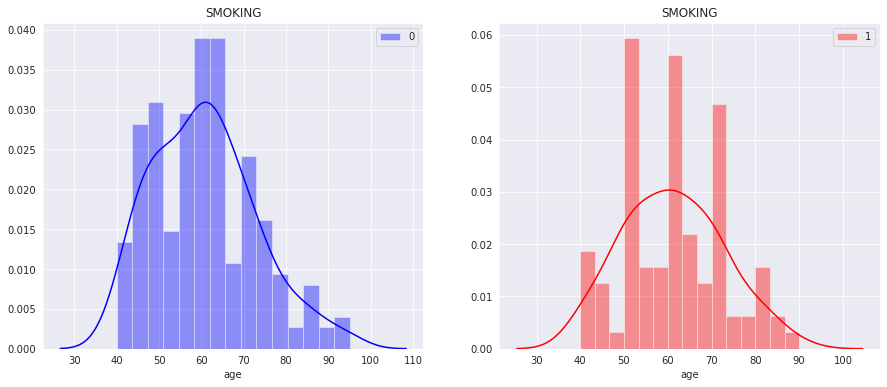

In [13]:
for cat in cat_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.distplot(data[data[cat]==0]['age'],label=0,color='blue',bins=15)
    plt.legend()
    plt.title(cat.upper())
    plt.subplot(1,2,2)
    sns.distplot(data[data[cat]==1]['age'],label=1,color='red',bins=15)
    plt.legend()
    plt.title(cat.upper())
    plt.show()

Mostly people having anaemia are of age range 47 to 66 years.

Mostly diabetic patients are of age range 43 to 72 years.

Mostly people having High Blood Pressure are of age range 43 to 78 years.

Mostly males are of age range 54 to 64 years.

Mostly smokers are of age range 50 to 72 years.

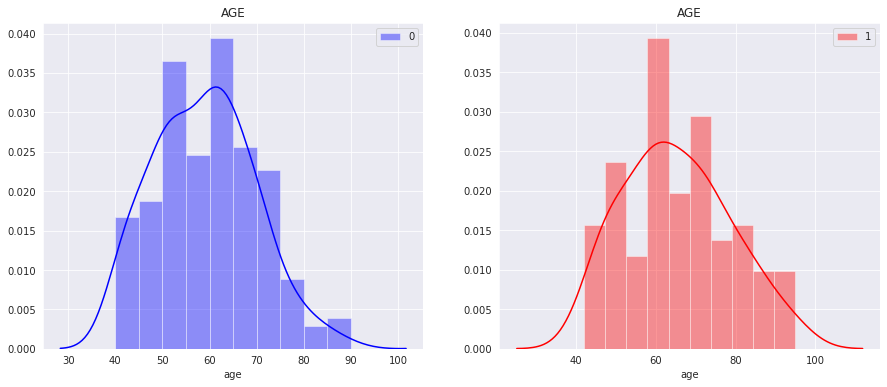

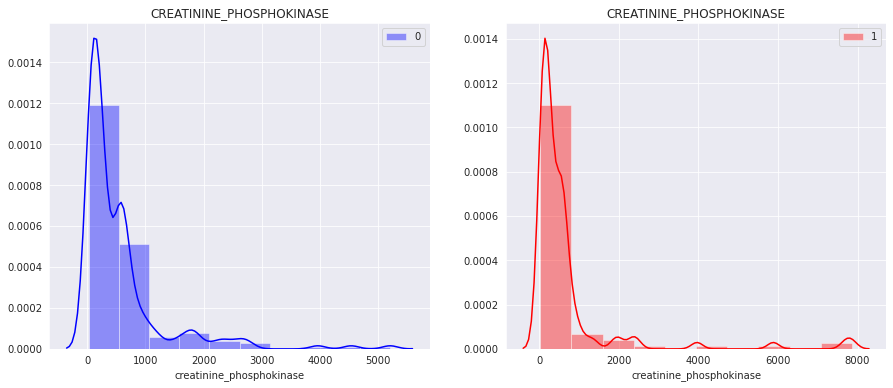

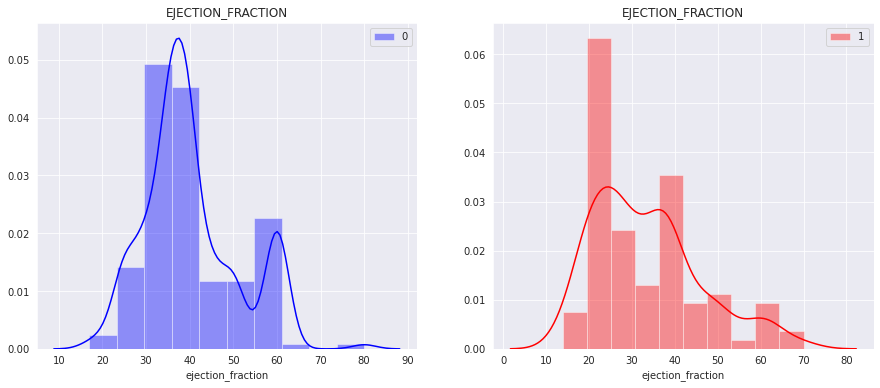

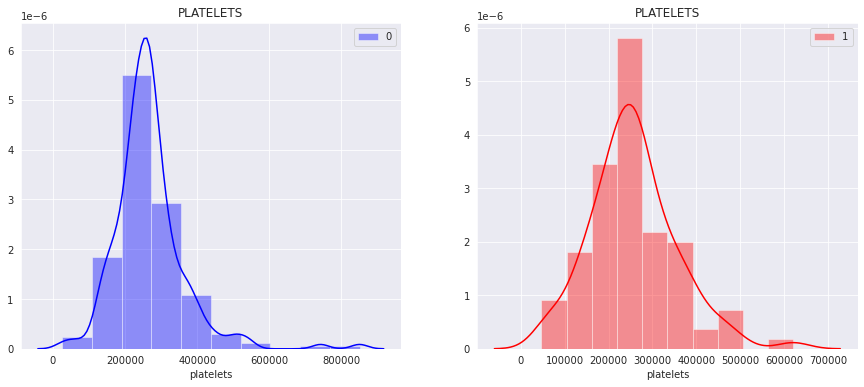

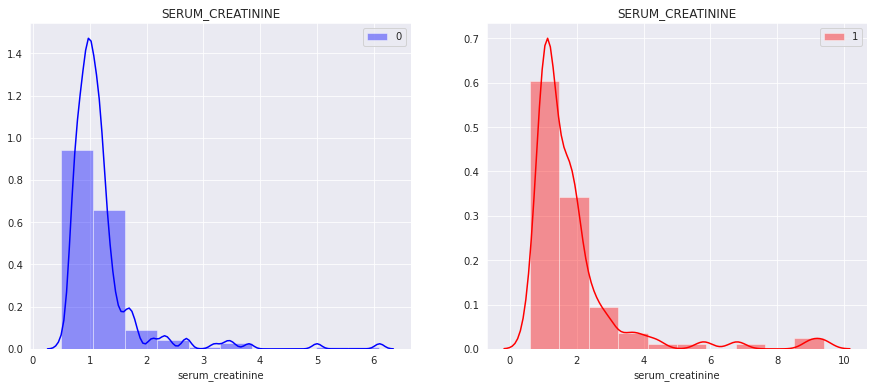

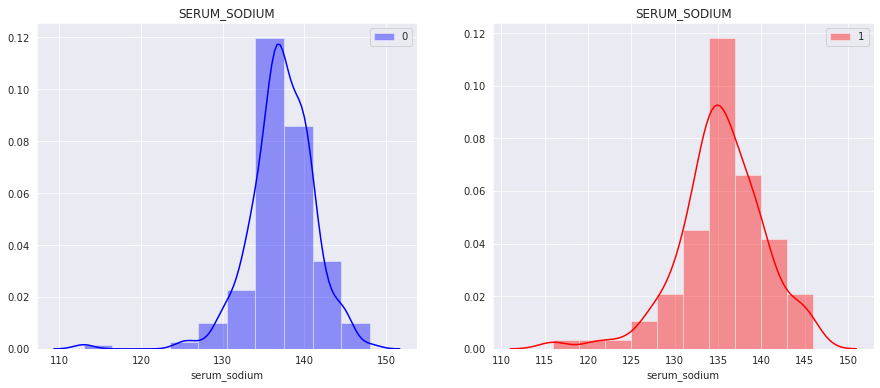

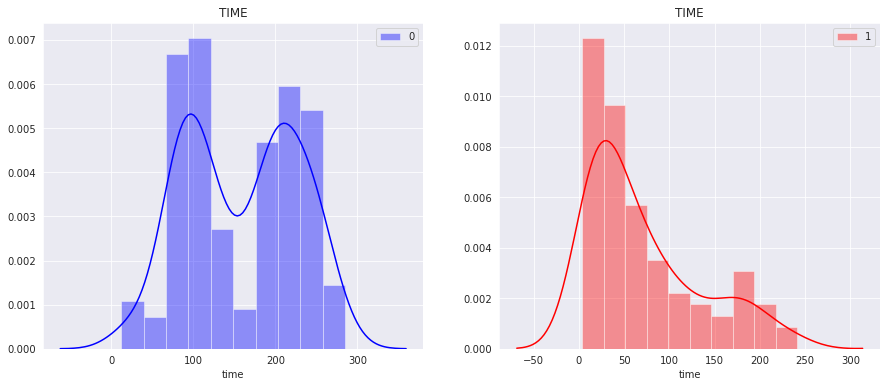

In [14]:
cont_features = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
for col in cont_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.distplot(data[data['DEATH_EVENT']==0][col],label=0,color='blue',bins=10)
    plt.legend()
    plt.title(col.upper())
    plt.subplot(1,2,2)
    sns.distplot(data[data['DEATH_EVENT']==1][col],label=1,color='red',bins=10)
    plt.legend()
    plt.title(col.upper())
    plt.show()

Age wise, most of the deaths is between the range of 40 and 80.

People with low level of Creatinine Phosphokinase (about 0-800 mcg/L) have mostly died due to heart failure.

The ejection fraction of blood from heart of about 14-60% has led to heart failure.

There is a normal distribution for platelet counts from 0 to 600000 and most people with counts of 150000-350000 have resulted in heart failure.

The level of serum creatinine of about 0.8 to 2.3 mg/dL had heart failure.


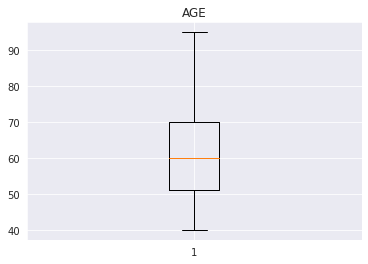

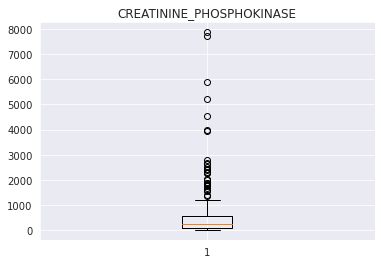

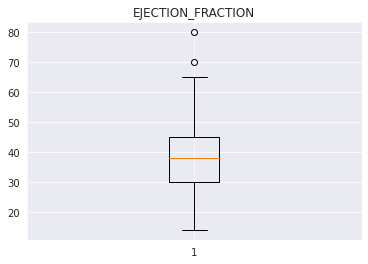

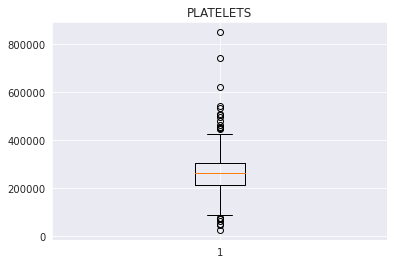

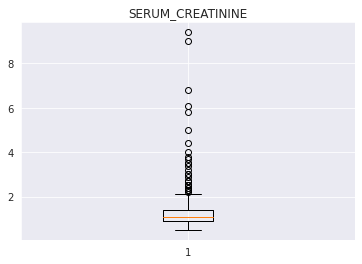

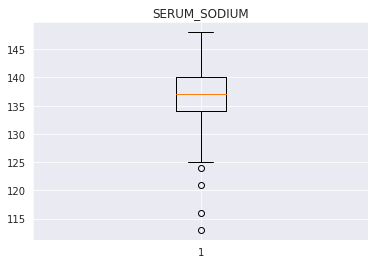

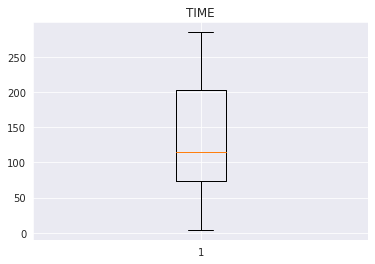

In [15]:
for col in cont_features:
    plt.boxplot(data[col])
    plt.title(col.upper())
    plt.show()

All the continuous value features have outliers.

All the features except age and time have the most outliers.

### Model Prediction

In [16]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[[46  2]
 [ 9 18]]
0.8533333333333334
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        48
           1       0.90      0.67      0.77        27

    accuracy                           0.85        75
   macro avg       0.87      0.81      0.83        75
weighted avg       0.86      0.85      0.85        75



In [19]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=10,n_jobs=-1)
val_score

array([0.86956522, 0.7826087 , 0.86956522, 0.95652174, 0.77272727,
       0.90909091, 0.86363636, 0.72727273, 0.81818182, 0.77272727])

### Hyper Parameter Tuning

In [20]:
rfc = RandomForestClassifier()
rf_params = {'n_estimators':[i for i in range(100,1000,10)],
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':[i for i in range(10,1000,10)],
          'min_samples_split':[2,4,6,8,10],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}

In [21]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator=rfc,n_jobs=-1,cv=10,n_iter=100,param_distributions=rf_params,verbose=5,random_state=0)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.4min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split

In [22]:
rs

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, 210, 220,
                                                      230, 240, 250, 260, 270,
                                                      280, 290, 300, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split

In [23]:
rs.best_params_

{'n_estimators': 240,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 900,
 'criterion': 'entropy'}

In [24]:
rs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=900, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=6,
                       n_estimators=240)

### Tuned Model Prdiction

In [25]:
best = rs.best_estimator_
y_pred = best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  2]
 [10 17]]
0.84
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        48
           1       0.89      0.63      0.74        27

    accuracy                           0.84        75
   macro avg       0.86      0.79      0.81        75
weighted avg       0.85      0.84      0.83        75



### So the default model (85.33%) gave more accuracy than the hyper parameter tuned model (84%).